## Assignment 1: Dividend initiations, Stock Splits and stock returns

When firms initiate new dividends or split their shares their stock prices 
generally increase.
- How do these announcements affect returns and the risks of these 
stocks going forward?

## Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from datetime import date, timedelta

In [2]:
raw_data = pd.read_csv(r"C:\Users\pc\Desktop\hw1\CRSP_Updated_Clean_2019.csv") 

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034850 entries, 0 to 2034849
Data columns (total 15 columns):
date                 object
stock_id             int64
ticker               object
shrout_adj_factor    float64
price                float64
return_incl_divs     float64
shrout               float64
return_ex_divs       float64
mktrf                float64
smb                  float64
hml                  float64
rf                   float64
mom                  float64
split_dummy          int64
div_init_dummy       int64
dtypes: float64(10), int64(3), object(2)
memory usage: 232.9+ MB


In [4]:
raw_data.head()

,date,stock_id,ticker,shrout_adj_factor,price,return_incl_divs,shrout,return_ex_divs,mktrf,smb,hml,rf,mom,split_dummy,div_init_dummy
0,30jan1987,10000,OMFGA,NaN,0.406250,-0.212121,3893.0,-0.212121,0.1247,-0.0181,-0.0318,0.0042,0.0210,0,0
1,27feb1987,10000,OMFGA,NaN,0.406250,0.000000,3893.0,0.000000,0.0439,0.0349,-0.0599,0.0043,-0.0217,0,0
2,31mar1987,10000,OMFGA,NaN,0.250000,-0.384615,3893.0,-0.384615,0.0164,0.0037,0.0166,0.0047,0.0160,0,0
3,30apr1987,10000,OMFGA,NaN,0.234375,-0.062500,3893.0,-0.062500,-0.0211,-0.0169,-0.0033,0.0044,0.0026,0,0
4,29may1987,10000,OMFGA,NaN,0.218750,-0.066667,3893.0,-0.066667,0.0011,-0.0053,0.0013,0.0038,-0.0068,0,0


In [5]:
raw_data.tail()

,date,stock_id,ticker,shrout_adj_factor,price,return_incl_divs,shrout,return_ex_divs,mktrf,smb,hml,rf,mom,split_dummy,div_init_dummy
2034845,31aug2018,93436,TSLA,NaN,301.660004,0.011806,170593.0,0.011806,0.0344,0.0123,-0.0412,0.0016,0.0530,0,0
2034846,28sep2018,93436,TSLA,NaN,264.769989,-0.122290,171578.0,-0.122290,0.0006,-0.0237,-0.0134,0.0015,-0.0009,0,0
2034847,31oct2018,93436,TSLA,NaN,337.320007,0.274011,171733.0,0.274011,-0.0768,-0.0468,0.0341,0.0019,-0.0182,0,0
2034848,30nov2018,93436,TSLA,NaN,350.480011,0.039013,171733.0,0.039013,0.0169,-0.0074,0.0019,0.0018,-0.0140,0,0
2034849,31dec2018,93436,TSLA,NaN,332.799988,-0.050445,171733.0,-0.050445,-0.0955,-0.0260,-0.0151,0.0019,0.0173,0,0


In [6]:
data = raw_data.copy()
data.date = pd.to_datetime(data.date, format="%d%b%Y")
data.index = data['date']
data = data.drop(['date'],axis=1)
data.shrout_adj_factor = data.shrout_adj_factor.fillna(0)
RB =data.index.unique()
data.head()

,stock_id,ticker,shrout_adj_factor,price,return_incl_divs,shrout,return_ex_divs,mktrf,smb,hml,rf,mom,split_dummy,div_init_dummy
date,,,,,,,,,,,,,,
1987-01-30,10000,OMFGA,0.0,0.406250,-0.212121,3893.0,-0.212121,0.1247,-0.0181,-0.0318,0.0042,0.0210,0,0
1987-02-27,10000,OMFGA,0.0,0.406250,0.000000,3893.0,0.000000,0.0439,0.0349,-0.0599,0.0043,-0.0217,0,0
1987-03-31,10000,OMFGA,0.0,0.250000,-0.384615,3893.0,-0.384615,0.0164,0.0037,0.0166,0.0047,0.0160,0,0
1987-04-30,10000,OMFGA,0.0,0.234375,-0.062500,3893.0,-0.062500,-0.0211,-0.0169,-0.0033,0.0044,0.0026,0,0
1987-05-29,10000,OMFGA,0.0,0.218750,-0.066667,3893.0,-0.066667,0.0011,-0.0053,0.0013,0.0038,-0.0068,0,0


### functions

In [7]:
def select_div_stocks(data, rb):
    data = data.loc[rb] 
    div_stock = data[data.div_init_dummy > 0].stock_id
    if len(div_stock) == 0:
        div_stock = data.stock_id
    return(list(div_stock.unique()))
def select_split_stocks(data, rb):
    data = data.loc[rb] 
    split_stock = data[data.split_dummy > 0].stock_id
    if len(split_stock) == 0:
        split_stock = data.stock_id
    return(list(split_stock.unique()))
def calc_weights(assets):
    return pd.Series(1.0, index=assets) / n

### Test of first month_ew_div(1988-01-29) 

In [8]:
i=0
rb      = RB[i:i+12]     # 1st element of RB
rb_next = RB[i+1:i+13]   # 2nd element of RB
    
assets = select_div_stocks(data,rb)
#return data should be used from end of invested month's last day's return value
t = data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb_next[-1]]
#number of assets that has been invested
n = len(data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb[-1]])
current_positions = t.price
#weights should use data from 'n' (t >= n)
weights = calc_weights(assets)
current_ret = sum(list(t.return_incl_divs.fillna(0))*weights[0:len(t.return_incl_divs.fillna(0))])
current_ret

0.07406233522172953

## Equal weight dividend stock investment

In [9]:
value = 1
ret = []
mktrf = []
for i in range(0,len(RB)-12):
    rb      = RB[i:i+12]    
    rb_next = RB[i+1:i+13]  
    assets = select_div_stocks(data,rb)
    t = data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb_next[-1]]
    n = len(data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb[-1]])
    current_positions = t.price
    weights = calc_weights(assets)
    current_ret = sum(list(t.return_incl_divs.fillna(0))*weights[0:len(t.return_incl_divs.fillna(0))])
    ret.append(current_ret)
    mktrf.append(list(t.mktrf.unique()))
    value = value*(1 + current_ret)

In [10]:
value

97.45870233628912

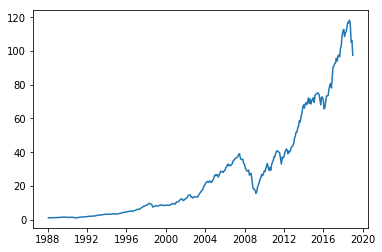

In [11]:
RET_ew_div = pd.DataFrame(index=RB[12:],data=ret)
RET_ew_div.columns=['ret']
RET_ew_div.ret.add(1).cumprod()
plt.plot(RET_ew_div.ret.add(1).cumprod())
plt.show()

## Annual_ew_div's Sharpe ratio table

In [12]:
rf = pd.DataFrame()
rf['rf'] = data.rf[~data.rf.index.duplicated(keep='first')]
RET_ew_div.sub(rf.rf, axis=0)
RX_ew_div_MONTHLY = RET_ew_div.sub(rf.rf, axis=0)['1988':]
RET_ew_div_table = pd.DataFrame()
RET_ew_div_table['RP']     = RX_ew_div_MONTHLY.add(1).resample('A').agg('prod').sub(1).mean()
RET_ew_div_table['Vol']    = RX_ew_div_MONTHLY.std()*12**0.5       
RET_ew_div_table['Sharpe'] = RET_ew_div_table.RP / RET_ew_div_table.Vol
RET_ew_div_table

,RP,Vol,Sharpe
ret,0.151286,0.141591,1.068468


## Comparing two periods' Sharpe Ratio

In [13]:
R1 = RX_ew_div_MONTHLY['1988':'2003-06']
R2 = RX_ew_div_MONTHLY['2003-07':'2018']
Ctable_ew_div = pd.DataFrame()
Ctable_ew_div['SR1'] = R1.add(1).resample('A').agg('prod').sub(1).mean()/(R1.std()*12**0.5)
Ctable_ew_div['SR2'] = R2.add(1).resample('A').agg('prod').sub(1).mean()/(R2.std()*12**0.5)
Ctable_ew_div

,SR1,SR2
ret,1.236115,0.873805


## Finding alpha and beta in Monthly_ew_div

In [14]:
start = '1988'
end   = '2018'

y = RX_ew_div_MONTHLY[start:end]
x = pd.DataFrame(index=RB[12:],data=mktrf)
x.columns = ['mktrf']
x1 = x[start:end]

sm.OLS(y, sm.add_constant(x1),  missing='drop').fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     701.1
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           2.03e-87
Time:                        04:53:40   Log-Likelihood:                 859.74
No. Observations:                 372   AIC:                            -1715.
Df Residuals:                     370   BIC:                            -1708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0055      0.001      4.377      0.000       0.003       0.008
mktrf          0.7930      0.030     26.478      0.000       0.734       0.852
==============================================================================
Omnibus:                        8.689   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               11.487
Skew:                           0.202   Prob(JB):                      0.00320
Kurtosis:                       3.761   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Equal weight split stock investment

In [15]:
value = 1
ret = []
mktrf = []
for i in range(0,len(RB)-12):
    rb      = RB[i:i+12]     # 1st element of RB
    rb_next = RB[i+1:i+13]   # 2nd element of RB
    
    assets = select_split_stocks(data,rb)
    t = data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb_next[-1]]
    n = len(data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb[-1]])
    current_positions = t.price
    weights = calc_weights(assets)
    current_ret = sum(list(t.return_incl_divs.fillna(0))*weights[0:len(t.return_incl_divs.fillna(0))])
    ret.append(current_ret)
    mktrf.append(list(t.mktrf.unique()))
    value = value*(1 + current_ret)

In [16]:
value

30.320057147640668

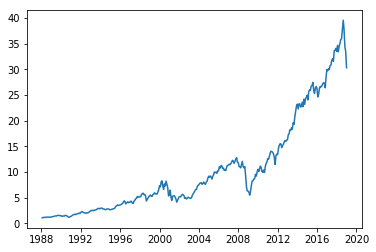

In [17]:
RET_ew_split = pd.DataFrame(index=RB[12:],data=ret)
RET_ew_split.columns=['ret']
RET_ew_split.ret.add(1).cumprod()
plt.plot(RET_ew_split.ret.add(1).cumprod())
plt.show()

## Annual_ew_split's Sharpe ratio table

In [18]:
rf = pd.DataFrame()
rf['rf'] = data.rf[~data.rf.index.duplicated(keep='first')]
RET_ew_split.sub(rf.rf, axis=0)
RX_ew_split_MONTHLY = RET_ew_split.sub(rf.rf, axis=0)['1988':]
RET_ew_split_table = pd.DataFrame()                        
RET_ew_split_table['RP']     = RX_ew_split_MONTHLY.add(1).resample('A').agg('prod').sub(1).mean()
RET_ew_split_table['Vol']    = RX_ew_split_MONTHLY.std()*12**0.5     
RET_ew_split_table['Sharpe'] = RET_ew_split_table.RP / RET_ew_split_table.Vol
RET_ew_split_table

,RP,Vol,Sharpe
ret,0.109445,0.194681,0.562177


## Comparing two periods' Sharpe Ratio

In [19]:
R1 = RX_ew_split_MONTHLY['1988':'2003-06'] 
R2 = RX_ew_split_MONTHLY['2003-07':'2018'] 
Ctable_ew_split = pd.DataFrame()
Ctable_ew_split['SR1'] = R1.add(1).resample('A').agg('prod').sub(1).mean()/(R1.std()*12**0.5)
Ctable_ew_split['SR2'] = R2.add(1).resample('A').agg('prod').sub(1).mean()/(R2.std()*12**0.5)
Ctable_ew_split

,SR1,SR2
ret,0.405257,0.700489


## Finding alpha and beta in Monthly_ew_split

In [20]:
start = '1988'
end   = '2018'

y = RX_ew_split_MONTHLY[start:end]
x = pd.DataFrame(index=RB[12:],data=mktrf)
x.columns = ['mktrf']
x1 = x[start:end]

sm.OLS(y, sm.add_constant(x1),  missing='drop').fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     1139.
Date:                Fri, 05 Apr 2019   Prob (F-statistic):          5.59e-115
Time:                        04:57:28   Log-Likelihood:                 805.02
No. Observations:                 372   AIC:                            -1606.
Df Residuals:                     370   BIC:                            -1598.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      0.434      0.664      -0.002       0.004
mktrf          1.1708      0.035     33.746      0.000       1.103       1.239
==============================================================================
Omnibus:                       51.284   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.370
Skew:                           0.517   Prob(JB):                     6.90e-45
Kurtosis:                       6.472   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Value-based weight calculating function

In [21]:
def calc_vweights(assets):
    mcap = sum(list(((m.shrout_adj_factor+m.shrout)*m.price).fillna(0)))
    vweights = list(((m.shrout_adj_factor+m.shrout)*m.price/mcap).fillna(0))[0:len(m.price)]
    return pd.Series(vweights,index=assets[0:len(m.price)])

### Test of first month_vw_div(1988-01-29)

In [22]:
i=0
rb      = RB[i:i+12]    
rb_next = RB[i+1:i+13]  
    
assets = select_div_stocks(data,rb)
t = data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb_next[-1]]
m = data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb[-1]]
current_positions = t.price
weights = calc_vweights(assets)
k = t.set_index('stock_id')
temp = pd.concat([k,weights],axis=1,join='inner')
current_ret = sum(list(temp.return_incl_divs.fillna(0))*(temp.iloc[:,13]))
current_ret

0.05552948655306407

## Value weight divident stock investment

In [23]:
value = 1
ret = []
mktrf = []
for i in range(0,len(RB)-12):
    rb      = RB[i:i+12]    
    rb_next = RB[i+1:i+13]  
    
    assets = select_div_stocks(data,rb)
    t = data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb_next[-1]]
    m = data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb[-1]]
    current_positions = t.price
    weights = calc_vweights(assets)
    k = t.set_index('stock_id')
    temp = pd.concat([k,weights],axis=1,join='inner')
    current_ret = sum(list(temp.return_incl_divs.fillna(0))*(temp.iloc[:,13]))
    ret.append(current_ret)
    mktrf.append(list(t.mktrf.unique()))
    value = value*(1 + current_ret)    

In [24]:
value

46.81875640167888

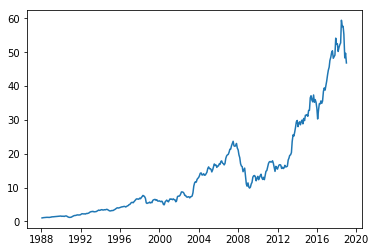

In [25]:
RET_vw_div = pd.DataFrame(index=RB[12:],data=ret)
RET_vw_div.columns=['ret']
RET_vw_div.ret.add(1).cumprod()
plt.plot(RET_vw_div.ret.add(1).cumprod())
plt.show()

## Annual_vw_div's Sharpe ratio table

In [26]:
rf = pd.DataFrame()
rf['rf'] = data.rf[~data.rf.index.duplicated(keep='first')]
RET_vw_div.sub(rf.rf, axis=0)
RX_vw_div_MONTHLY = RET_vw_div.sub(rf.rf, axis=0)['1988':]
RET_vw_div_table = pd.DataFrame()                        
RET_vw_div_table['RP']     = RX_vw_div_MONTHLY.add(1).resample('A').agg('prod').sub(1).mean()
RET_vw_div_table['Vol']    = RX_vw_div_MONTHLY.std()*12**0.5  
RET_vw_div_table['Sharpe'] = RET_vw_div_table.RP / RET_vw_div_table.Vol
RET_vw_div_table

,RP,Vol,Sharpe
ret,0.12957,0.175734,0.737311


## Comparing two periods' Sharpe Ratio

In [27]:
R1 = RX_vw_div_MONTHLY['1988':'2003-06'] 
R2 = RX_vw_div_MONTHLY['2003-07':'2018'] 
Ctable_vw_div = pd.DataFrame()
Ctable_vw_div['SR1'] = R1.add(1).resample('A').agg('prod').sub(1).mean()/(R1.std()*12**0.5)
Ctable_vw_div['SR2'] = R2.add(1).resample('A').agg('prod').sub(1).mean()/(R2.std()*12**0.5)
Ctable_vw_div

,SR1,SR2
ret,0.745165,0.647252


## Finding alpha and beta in Monthly_vw_div

In [28]:
start = '1988'
end   = '2018'

y = RX_vw_div_MONTHLY[start:end]
x = pd.DataFrame(index=RB[12:],data=mktrf)
x.columns = ['mktrf']
x1 = x[start:end]

sm.OLS(y, sm.add_constant(x1),  missing='drop').fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     207.4
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           1.20e-37
Time:                        05:02:22   Log-Likelihood:                 664.46
No. Observations:                 372   AIC:                            -1325.
Df Residuals:                     370   BIC:                            -1317.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.002      2.056      0.041       0.000       0.009
mktrf          0.7291      0.051     14.402      0.000       0.630       0.829
==============================================================================
Omnibus:                       98.650   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.271
Skew:                           1.113   Prob(JB):                     1.61e-83
Kurtosis:                       7.432   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Value weight split stock investment

In [29]:
value = 1
ret = []
mktrf = []
for i in range(0,len(RB)-12):
    rb      = RB[i:i+12]    
    rb_next = RB[i+1:i+13]  
    
    assets = select_split_stocks(data,rb)
    t = data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb_next[-1]]
    m = data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb[-1]]
    current_positions = t.price
    weights = calc_vweights(assets)
    k = t.set_index('stock_id')
    temp = pd.concat([k,weights],axis=1,join='inner')
    current_ret = sum(list(temp.return_incl_divs.fillna(0))*(temp.iloc[:,13]))
    ret.append(current_ret)
    mktrf.append(list(t.mktrf.unique()))
    value = value*(1 + current_ret)    

In [30]:
value

19.369640668993846

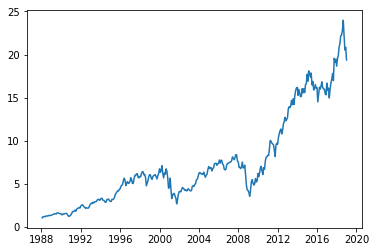

In [31]:
RET_vw_split = pd.DataFrame(index=RB[12:],data=ret)
RET_vw_split.columns=['ret']
RET_vw_split.ret.add(1).cumprod()
plt.plot(RET_vw_split.ret.add(1).cumprod())
plt.show()

## Annual_vw_split's Sharpe ratio table

In [32]:
rf = pd.DataFrame()
rf['rf'] = data.rf[~data.rf.index.duplicated(keep='first')]
RET_vw_split.sub(rf.rf, axis=0)
RX_vw_split_MONTHLY = RET_vw_split.sub(rf.rf, axis=0)['1988':]
RET_vw_split_table = pd.DataFrame()                        
RET_vw_split_table['RP']     = RX_vw_split_MONTHLY.add(1).resample('A').agg('prod').sub(1).mean()
RET_vw_split_table['Vol']    = RX_vw_split_MONTHLY.std()*12**0.5    
RET_vw_split_table['Sharpe'] = RET_vw_split_table.RP / RET_vw_split_table.Vol
RET_vw_split_table

,RP,Vol,Sharpe
ret,0.093183,0.222186,0.419392


## Comparing two periods' Sharpe Ratio

In [33]:
R1 = RX_vw_split_MONTHLY['1988':'2003-06']
R2 = RX_vw_split_MONTHLY['2003-07':'2018']
Ctable_vw_split = pd.DataFrame()
Ctable_vw_split['SR1'] = R1.add(1).resample('A').agg('prod').sub(1).mean()/(R1.std()*12**0.5)
Ctable_vw_split['SR2'] = R2.add(1).resample('A').agg('prod').sub(1).mean()/(R2.std()*12**0.5)
Ctable_vw_split

,SR1,SR2
ret,0.315,0.505459


## Finding alpha and beta in Monthly_vw_split

In [34]:
start = '1988'
end   = '2018'

y = RX_vw_split_MONTHLY[start:end]
x = pd.DataFrame(index=RB[12:],data=mktrf)
x.columns = ['mktrf']
x1 = x[start:end]

sm.OLS(y, sm.add_constant(x1),  missing='drop').fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     541.7
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           1.88e-74
Time:                        05:07:49   Log-Likelihood:                 662.16
No. Observations:                 372   AIC:                            -1320.
Df Residuals:                     370   BIC:                            -1312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.002     -0.099      0.921      -0.004       0.004
mktrf          1.1856      0.051     23.274      0.000       1.085       1.286
==============================================================================
Omnibus:                       37.637   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.625
Skew:                           0.381   Prob(JB):                     3.19e-28
Kurtosis:                       5.755   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Dividend and Split all together with value weight

### functions

In [35]:
def select_assets(data,rb):
    data = data.loc[rb]
    div_or_split_stock = data[(data.div_init_dummy > 0) | (data.split_dummy > 0)].stock_id
    if len(div_or_split_stock) == 0:
        div_or_split_stock = data.stock_id
    return(list(div_or_split_stock))

### Test of first month_ew_div_or_split(1988-01-29)

In [36]:
i=0
rb      = RB[i:i+12]    
rb_next = RB[i+1:i+13]  
    
assets = select_assets(data,rb)
t = data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb_next[-1]]
n = len(data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb[-1]])
current_positions = t.price
weights = calc_weights(assets)
current_ret = sum(list(t.return_incl_divs.fillna(0))*weights[0:len(t.return_incl_divs.fillna(0))])
current_ret

0.051110724222698106

## Div_or_Split equal weight investment

In [37]:
value = 1
ret = []
mktrf = []
for i in range(0,len(RB)-12):
    rb      = RB[i:i+12]    
    rb_next = RB[i+1:i+13]  
    
    assets = select_assets(data,rb)
    t = data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb_next[-1]]
    n = len(data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb[-1]])
    current_positions = t.price
    weights = calc_weights(assets)
    current_ret = sum(list(t.return_incl_divs.fillna(0))*weights[0:len(t.return_incl_divs.fillna(0))])
    ret.append(current_ret)
    mktrf.append(list(t.mktrf.unique()))
    value = value*(1 + current_ret)

In [38]:
value

48.023937870954924

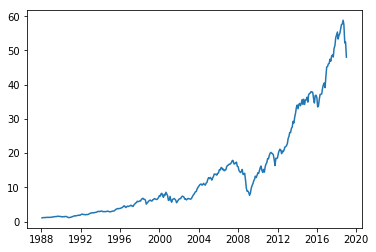

In [39]:
RET_ew_ds = pd.DataFrame(index=RB[12:],data=ret)
RET_ew_ds.columns=['ret']
RET_ew_ds.ret.add(1).cumprod()
plt.plot(RET_ew_ds.ret.add(1).cumprod())
plt.show()

## Annual_ew_div_or_split's Sharpe ratio table

In [40]:
rf = pd.DataFrame()
rf['rf'] = data.rf[~data.rf.index.duplicated(keep='first')]
RET_ew_ds.sub(rf.rf, axis=0)
RX_ew_ds_MONTHLY = RET_ew_ds.sub(rf.rf, axis=0)['1988':]
RET_ew_ds_table = pd.DataFrame()                        
RET_ew_ds_table['RP']     = RX_ew_ds_MONTHLY.add(1).resample('A').agg('prod').sub(1).mean()
RET_ew_ds_table['Vol']    = RX_ew_ds_MONTHLY.std()*12**0.5    
RET_ew_ds_table['Sharpe'] = RET_ew_ds_table.RP / RET_ew_ds_table.Vol
RET_ew_ds_table

,RP,Vol,Sharpe
ret,0.124861,0.169403,0.737066


## Comparing two periods' Sharpe Ratio

In [41]:
R1 = RX_ew_ds_MONTHLY['1988':'2003-06']
R2 = RX_ew_ds_MONTHLY['2003-07':'2018']
Ctable_ew_ds = pd.DataFrame()
Ctable_ew_ds['SR1'] = R1.add(1).resample('A').agg('prod').sub(1).mean()/(R1.std()*12**0.5)
Ctable_ew_ds['SR2'] = R2.add(1).resample('A').agg('prod').sub(1).mean()/(R2.std()*12**0.5)
Ctable_ew_ds

,SR1,SR2
ret,0.574515,0.847382


## Finding alpha and beta in Monthly_ew_div_or_split

In [42]:
start = '1988'
end   = '2018'

y = RX_ew_ds_MONTHLY[start:end]
x = pd.DataFrame(index=RB[12:],data=mktrf)
x.columns = ['mktrf']
x1 = x[start:end]

sm.OLS(y, sm.add_constant(x1),  missing='drop').fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1360.
Date:                Fri, 05 Apr 2019   Prob (F-statistic):          5.85e-126
Time:                        05:13:18   Log-Likelihood:                 882.16
No. Observations:                 372   AIC:                            -1760.
Df Residuals:                     370   BIC:                            -1752.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.001      1.976      0.049    1.14e-05       0.005
mktrf          1.0397      0.028     36.873      0.000       0.984       1.095
==============================================================================
Omnibus:                       63.347   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.854
Skew:                           0.736   Prob(JB):                     4.45e-46
Kurtosis:                       6.362   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Div_or_Split value weight investment

In [ ]:
value = 1
ret = []
mktrf = []
for i in range(0,len(RB)-12):
    rb      = RB[i:i+12]    
    rb_next = RB[i+1:i+13]  
    
    assets = select_assets(data,rb)
    t = data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb_next[-1]]
    m = data[(data.stock_id.isin(assets)) & (data.price.notna())].loc[rb[-1]]
    current_positions = t.price
    weights = calc_vweights(assets)
    w = pd.DataFrame(index=weights.index, data=weights)
    k = t.set_index('stock_id')
    temp = pd.merge( k, w, left_index=True, right_index=True)
    current_ret = sum(list(temp.return_incl_divs.fillna(0))*(temp.iloc[:,13]))
    ret.append(current_ret)
    mktrf.append(list(t.mktrf.unique()))
    value = value*(1 + current_ret)    

In [ ]:
value

In [ ]:
RET_vw_ds = pd.DataFrame(index=RB[12:],data=ret)
RET_vw_ds.columns=['ret']
RET_vw_ds.ret.add(1).cumprod()
plt.plot(RET_vw_ds.ret.add(1).cumprod())
plt.show()

## Annual_vw_div_or_split's Sharpe ratio table

In [ ]:
rf = pd.DataFrame()
rf['rf'] = data.rf[~data.rf.index.duplicated(keep='first')]
RET_vw_ds.sub(rf.rf, axis=0)
RX_vw_ds_MONTHLY = RET_vw_ds.sub(rf.rf, axis=0)['1988':]
RET_vw_ds_table = pd.DataFrame()                        
RET_vw_ds_table['RP']     = RX_vw_ds_MONTHLY.add(1).resample('A').agg('prod').sub(1).mean()
RET_vw_ds_table['Vol']    = RX_vw_ds_MONTHLY.std()*12**0.5       
RET_vw_ds_table['Sharpe'] = RET_vw_ds_table.RP / RET_vw_ds_table.Vol
RET_vw_ds_table

## Comparing two periods' Sharpe Ratio

In [ ]:
R1 = RX_vw_ds_MONTHLY['1988':'2003-06']
R2 = RX_vw_ds_MONTHLY['2003-07':'2018']
Ctable_vw_ds = pd.DataFrame()
Ctable_vw_ds['SR1'] = R1.add(1).resample('A').agg('prod').sub(1).mean()/(R1.std()*12**0.5)
Ctable_vw_ds['SR2'] = R2.add(1).resample('A').agg('prod').sub(1).mean()/(R2.std()*12**0.5)
Ctable_vw_ds

## Finding alpha and beta in Monthly_vw_div_or_split

In [ ]:
start = '1988'
end   = '2018'

y = RX_vw_ds_MONTHLY[start:end]
x = pd.DataFrame(index=RB[12:],data=mktrf)
x.columns = ['mktrf']
x1 = x[start:end]

sm.OLS(y, sm.add_constant(x1),  missing='drop').fit().summary() 

## Aggregated cumulative return plot

In [ ]:
all_ret = pd.DataFrame(index = RB[12:], data={'ew_div':RET_ew_div.ret, 'ew_split':RET_ew_split.ret,
                                              'vw_div':RET_vw_div.ret, 'vw_split':RET_vw_split.ret,
                                              'ew_ds':RET_ew_ds.ret, 'vw_ds':RET_vw_ds.ret})
all_ret.add(1).cumprod().plot()

## Aggregated SR table

In [ ]:
Sharpe_ratios = {'First_half':[Ctable_ew_div['SR1'].values,Ctable_ew_split['SR1'].values,
                               Ctable_vw_div['SR1'].values,Ctable_vw_split['SR1'].values,
                               Ctable_ew_ds['SR1'].values,Ctable_vw_ds['SR1'].values],
                 'Second_half':[Ctable_ew_div['SR2'].values,Ctable_ew_split['SR2'].values,
                                Ctable_vw_div['SR2'].values,Ctable_vw_split['SR2'].values,
                                Ctable_ew_ds['SR2'].values,Ctable_vw_ds['SR2'].values],
                 'Whole_period':[RET_ew_div_table['Sharpe'].values,RET_ew_split_table['Sharpe'].values,
                                RET_vw_div_table['Sharpe'].values,RET_vw_split_table['Sharpe'].values,
                                RET_ew_ds_table['Sharpe'].values,RET_vw_ds_table['Sharpe'].values]}
SR = pd.DataFrame(Sharpe_ratios, columns=['First_half','Second_half','Whole_period'])
SR.rename(index={0:'ew_div',1:'ew_split',2:'vw_div',3:'vw_split',4:'ew_ds',5:'vw_ds'}, inplace=True)
SR